In [14]:
import numpy as np 
import pandas as pd

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
df_invoice_purchases = pd.read_csv("D:/Inventory_analysis/invoice.csv")
df_sales = pd.read_csv("D:/Inventory_analysis/SalesFINAL12312016.csv")

In [20]:
df_invoice_purchases

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,04/01/2016,8124,21/12/2015,16/02/2016,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,07/01/2016,8137,22/12/2015,21/02/2016,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,09/01/2016,8169,24/12/2015,16/02/2016,5,106.60,4.61,None
3,480,BACARDI USA INC,12/01/2016,8106,20/12/2015,05/02/2016,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,07/01/2016,8170,24/12/2015,12/02/2016,1935,15527.25,429.20,None
...,...,...,...,...,...,...,...,...,...,...
702,1485,CASTLE BRANDS CORP.,01/03/2016,8841,09/02/2016,29/03/2016,1290,20060.24,102.31,None
703,2876,CENTEUR IMPORTS LLC,23/02/2016,8861,10/02/2016,08/04/2016,3,26.16,0.14,None
704,4380,CHARLES JACQUIN ET CIE INC,24/02/2016,8842,09/02/2016,04/04/2016,570,4974.48,24.87,None
705,1650,Circa Wines,26/02/2016,8896,12/02/2016,24/03/2016,27,175.23,0.82,None


In [21]:
df_sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,LEAD_TIME
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,01/01/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,13
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,01/02/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,13
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,01/03/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,13
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,01/08/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,13
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,01/09/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,1_HARDERSFIELD_12147,1,12147,Sterling Vintners CA Meritag,750mL,20,199.80,9.99,1/23/2016,750,2,2.25,1590,DIAGEO CHATEAU ESTATE WINES,13
560,1_HARDERSFIELD_12147,1,12147,Sterling Vintners CA Meritag,750mL,1,9.99,9.99,1/29/2016,750,2,0.11,1590,DIAGEO CHATEAU ESTATE WINES,19
561,1_HARDERSFIELD_12147,1,12147,Sterling Vintners CA Meritag,750mL,1,9.99,9.99,1/30/2016,750,2,0.11,1590,DIAGEO CHATEAU ESTATE WINES,13
562,1_HARDERSFIELD_12147,1,12147,Sterling Vintners CA Meritag,750mL,2,19.98,9.99,1/31/2016,750,2,0.22,1590,DIAGEO CHATEAU ESTATE WINES,8


In [22]:
df_invoice_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  707 non-null    int64  
 1   VendorName    707 non-null    object 
 2   InvoiceDate   707 non-null    object 
 3   PONumber      707 non-null    int64  
 4   PODate        707 non-null    object 
 5   PayDate       707 non-null    object 
 6   Quantity      707 non-null    int64  
 7   Dollars       707 non-null    float64
 8   Freight       707 non-null    float64
 9   Approval      707 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 55.4+ KB


In [23]:
df_invoice_purchases.describe()

,VendorNumber,PONumber,Quantity,Dollars,Freight
count,707.000000,707.000000,707.000000,707.000000,707.000000
mean,19366.403112,8471.479491,4672.442716,42766.390014,262.672249
std,32505.975826,207.566244,11278.443538,99013.702678,611.676836
min,105.000000,8106.000000,1.000000,4.140000,0.020000
25%,2876.000000,8294.500000,58.000000,719.120000,4.650000
50%,7239.000000,8471.000000,347.000000,3850.370000,22.580000
75%,10050.000000,8647.500000,3938.000000,32681.770000,189.040000
max,173357.000000,8897.000000,100183.000000,954454.160000,5972.450000


In [24]:
df_invoice_purchases.shape

(707, 10)

In [64]:
df_invoice_purchases.isnull().sum()

InvoiceDate     0
VendorNumber    0
VendorName      0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64

In [26]:
df_invoice_purchases.dropna(inplace=True)

In [27]:
from scipy import stats

# Define a threshold for Z-scores (e.g., 3 for a 99.7% confidence interval)
z_score_threshold = 3

# Calculate Z-scores for 'Quantity,' 'Dollars,' and 'Freight'
z_scores = stats.zscore(df_invoice_purchases[['Quantity', 'Dollars', 'Freight']])

# Create a boolean mask to identify outliers
outlier_mask = (abs(z_scores) < z_score_threshold).all(axis=1)

# Filter the DataFrame to remove outliers
df_invoice_purchases_no_outliers = df_invoice_purchases[outlier_mask]
df_invoice_purchases_no_outliers

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,04/01/2016,8124,21/12/2015,16/02/2016,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,07/01/2016,8137,22/12/2015,21/02/2016,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,09/01/2016,8169,24/12/2015,16/02/2016,5,106.60,4.61,None
4,516,BANFI PRODUCTS CORP,07/01/2016,8170,24/12/2015,12/02/2016,1935,15527.25,429.20,None
5,2396,BLACK PRINCE DISTILLERY INC,08/01/2016,8191,25/12/2015,06/02/2016,23,234.83,2.30,None
...,...,...,...,...,...,...,...,...,...,...
702,1485,CASTLE BRANDS CORP.,01/03/2016,8841,09/02/2016,29/03/2016,1290,20060.24,102.31,None
703,2876,CENTEUR IMPORTS LLC,23/02/2016,8861,10/02/2016,08/04/2016,3,26.16,0.14,None
704,4380,CHARLES JACQUIN ET CIE INC,24/02/2016,8842,09/02/2016,04/04/2016,570,4974.48,24.87,None
705,1650,Circa Wines,26/02/2016,8896,12/02/2016,24/03/2016,27,175.23,0.82,None


In [28]:
df_invoice_purchases.shape

(707, 10)

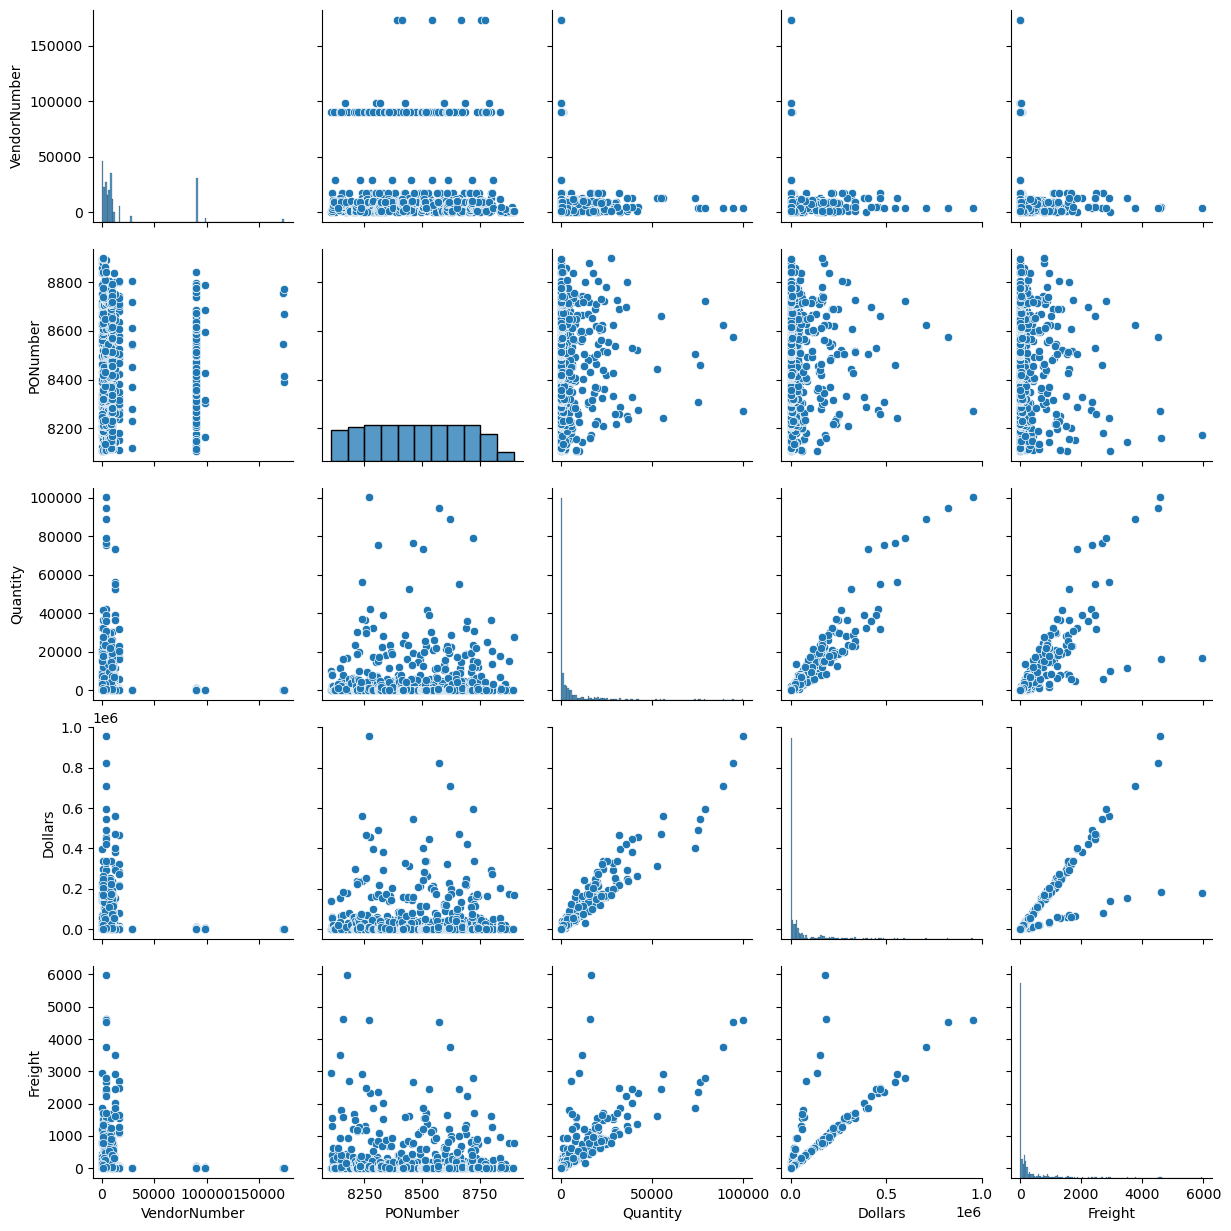

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_invoice_purchases)
plt.show()

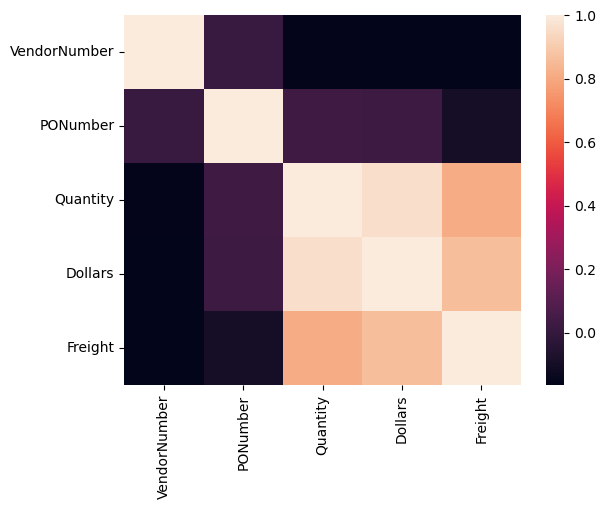

In [30]:
import matplotlib.pyplot as plt
sns.heatmap(df_invoice_purchases.corr())
plt.show()

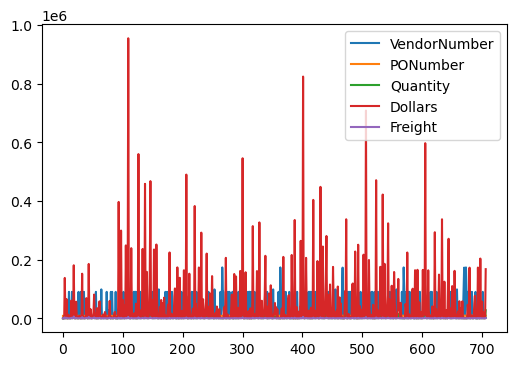

In [31]:
df_invoice_purchases.plot(figsize=(6,4))
plt.show()

# Augmented Dickey-Fuller Test for invoice

In [32]:
from statsmodels.tsa.stattools import adfuller

# Convert the "InvoiceDate" column to a datetime data type
df_invoice_purchases['InvoiceDate'] = pd.to_datetime(df_invoice_purchases['InvoiceDate'])

# Set "InvoiceDate" as the DataFrame's index
df_invoice_purchases.set_index('InvoiceDate', inplace=True)

# Select the "Quantity" column as time series data
time_series_data = df_invoice_purchases['Quantity']

# Perform the Dickey-Fuller Test
result = adfuller(time_series_data)

adf_statistic = result[0]
p_value = result[1]

print("Dickey-Fuller Test Results for Quantity:")
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

if p_value <= 0.05:
    print("Null hypothesis rejected. The data is likely stationary.")
else:
    print("Failed to reject the null hypothesis. The data may not be stationary.")


Dickey-Fuller Test Results for Quantity:
ADF Statistic: -4.257217005043625
p-value: 0.0005264097236238989
Null hypothesis rejected. The data is likely stationary.


In [33]:
# Access the index as a Series
invoice_dates = df_invoice_purchases.index


invoice_dates_list = invoice_dates.tolist()

In [34]:
df_invoice_purchases = df_invoice_purchases.reset_index()

# Label Encoding

In [35]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

df_trans = pd.DataFrame()
df_trans['VendorNumber'] = df_invoice_purchases['VendorNumber']
df_trans['VendorName'] = enc.fit_transform(df_invoice_purchases['VendorName']) 
df_trans['InvoiceDate'] = enc.fit_transform(df_invoice_purchases['InvoiceDate']) 
df_trans['PONumber'] = df_invoice_purchases['PONumber']
df_trans['PODate'] = enc.fit_transform(df_invoice_purchases['PODate'])
df_trans['PayDate'] = enc.fit_transform(df_invoice_purchases['PayDate'])
df_trans['Quantity'] = df_invoice_purchases['Quantity']
df_trans['Dollars'] = df_invoice_purchases['Dollars']
df_trans['Freight'] = df_invoice_purchases['Freight']
df_trans['Approval'] = enc.fit_transform(df_invoice_purchases['Approval']) 
df_trans

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,1,40,8124,28,35,6,214.26,3.47,1
1,4466,2,46,8137,30,45,15,140.55,8.57,1
2,388,4,50,8169,33,35,5,106.60,4.61,1
3,480,5,56,8106,26,9,10100,137483.78,2935.20,1
4,516,6,46,8170,33,27,1935,15527.25,429.20,1
...,...,...,...,...,...,...,...,...,...,...
702,1485,16,1,8841,12,62,1290,20060.24,102.31,1
703,2876,17,32,8861,14,18,3,26.16,0.14,1
704,4380,18,33,8842,12,8,570,4974.48,24.87,1
705,1650,21,35,8896,18,52,27,175.23,0.82,1


In [36]:
# Set "InvoiceDate" as the index again (if needed)
# df_invoice_purchases.set_index('InvoiceDate', inplace=True)

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse, aic

percentage_test = 0.2  # 20% as a decimal
n_test = int(len(df_trans) * percentage_test)

train = df_trans[:-n_test]
test = df_trans[-n_test:]

# Create and fit the VAR model
model = VAR(train)
model_fitted = model.fit()

# Evaluate the model on the test set
forecast = model_fitted.forecast(train.values[-model_fitted.k_ar:], steps=n_test)

rmse_result = rmse(test, forecast)

# Calculate the number of observations and the degrees of freedom
nobs = len(test)
log_likelihood = model_fitted.llf

aic_result = -2 * log_likelihood + 2 * len(model_fitted.params) / nobs
print("RMSE: ", rmse_result)
print("AIC: ", aic_result)

RMSE:  [3.69316472e+04 3.47019652e+01 8.44852370e+00 2.81565773e+02
 1.88265075e+01 2.13964916e+01 9.38578039e+03 7.95489464e+04
 3.95708590e+02 1.67570166e-01]
AIC:  69456.79389995725


In [42]:
result = model.fit(5)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 29, Nov, 2023
Time:                     13:03:06
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    98.1336
Nobs:                     561.000    HQIC:                   95.7344
Log likelihood:          -33872.7    FPE:                8.15939e+40
AIC:                      94.1975    Det(Omega_mle):     3.41800e+40
--------------------------------------------------------------------
Results for equation VendorNumber
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const               32453.995027     86036.719907            0.377           0.706
L1.VendorNumber        -0.007830         0.045684           -0.171           0.864
L1.VendorName         252.582998       132.28

In [44]:
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse, aic


# Create and fit the VAR model
model = VAR(train)
model_fitted = model.fit()

# Evaluate the model on the test set
forecast = model_fitted.forecast(train.values[-model_fitted.k_ar:], steps=n_test)

rmse_result = rmse(test, forecast)

# Calculate the number of observations and the degrees of freedom
nobs = len(test)
log_likelihood = model_fitted.llf

aic_result = -2 * log_likelihood + 2 * len(model_fitted.params) / nobs
print("RMSE: ", rmse_result)
print("AIC: ", aic_result)

RMSE:  [3.69316472e+04 3.47019652e+01 8.44852370e+00 2.81565773e+02
 1.88265075e+01 2.13964916e+01 9.38578039e+03 7.95489464e+04
 3.95708590e+02 1.67570166e-01]
AIC:  69456.79389995725


In [45]:
model_summary = model_fitted.summary()
print(model_summary)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 29, Nov, 2023
Time:                     13:03:08
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    95.7871
Nobs:                     565.000    HQIC:                   95.2723
Log likelihood:          -34728.3    FPE:                1.71048e+41
AIC:                      94.9427    Det(Omega_mle):     1.41051e+41
--------------------------------------------------------------------
Results for equation VendorNumber
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const               -1112.891451     68288.498194           -0.016           0.987
L1.VendorNumber        -0.034960         0.043201           -0.809           0.418
L1.VendorName         166.659829        42.15

In [46]:
# Number of steps (future time points) you want to forecast
n_forecast = 10 
# Forecast future values
forecast_invoice = model_fitted.forecast(model_fitted.endog, steps=n_forecast)

print("Forecasted values:")
print(forecast_invoice)

Forecasted values:
[[2.57395453e+04 8.93467794e+01 4.35434751e+01 8.66303387e+03
  3.53519311e+01 3.34408510e+01 7.54006154e+03 7.06976824e+04
  3.54325763e+02 9.00810621e-01]
 [2.36294155e+04 8.71267735e+01 3.81656363e+01 8.65866042e+03
  3.25868286e+01 3.19288785e+01 4.53008984e+03 4.22745858e+04
  1.66842635e+02 9.52864098e-01]
 [2.40249982e+04 8.51810066e+01 3.50628803e+01 8.65366580e+03
  3.02458224e+01 3.18896895e+01 5.00455759e+03 4.62213105e+04
  1.77346494e+02 9.48918339e-01]
 [2.37213457e+04 8.33496150e+01 3.29204711e+01 8.64859304e+03
  2.86915530e+01 3.18929543e+01 5.02238608e+03 4.61632195e+04
  1.68322381e+02 9.48872116e-01]
 [2.34837185e+04 8.16669152e+01 3.14530125e+01 8.64346251e+03
  2.76365830e+01 3.19181724e+01 5.10485479e+03 4.67488653e+04
  1.67231792e+02 9.48013429e-01]
 [2.32401024e+04 8.01078826e+01 3.04524921e+01 8.63833347e+03
  2.69226224e+01 3.19442718e+01 5.15960509e+03 4.71314429e+04
  1.67372094e+02 9.47432188e-01]
 [2.30065432e+04 7.86587061e+01 2.97722

In [38]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


In [39]:
df_sales.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05


In [40]:
df_sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [41]:
df_sales.dropna(inplace=True)

In [42]:
from scipy import stats

# Define a threshold for Z-scores (e.g., 3 for a 99.7% confidence interval)
z_score_threshold = 3

z_scores = stats.zscore(df_sales[['SalesQuantity', 'SalesDollars', 'SalesPrice']])

# Create a boolean mask to identify outliers
outlier_mask = (abs(z_scores) < z_score_threshold).all(axis=1)

# Filter the DataFrame to remove outliers
df_sales_no_outliers = df_sales[outlier_mask]
df_sales_no_outliers


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2/12/2016,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2/13/2016,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2/19/2016,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,19_WINTERVALE_39384,19,39384,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2/22/2016,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [43]:
df_sales.shape

(1048575, 14)

<Figure size 1200x600 with 0 Axes>

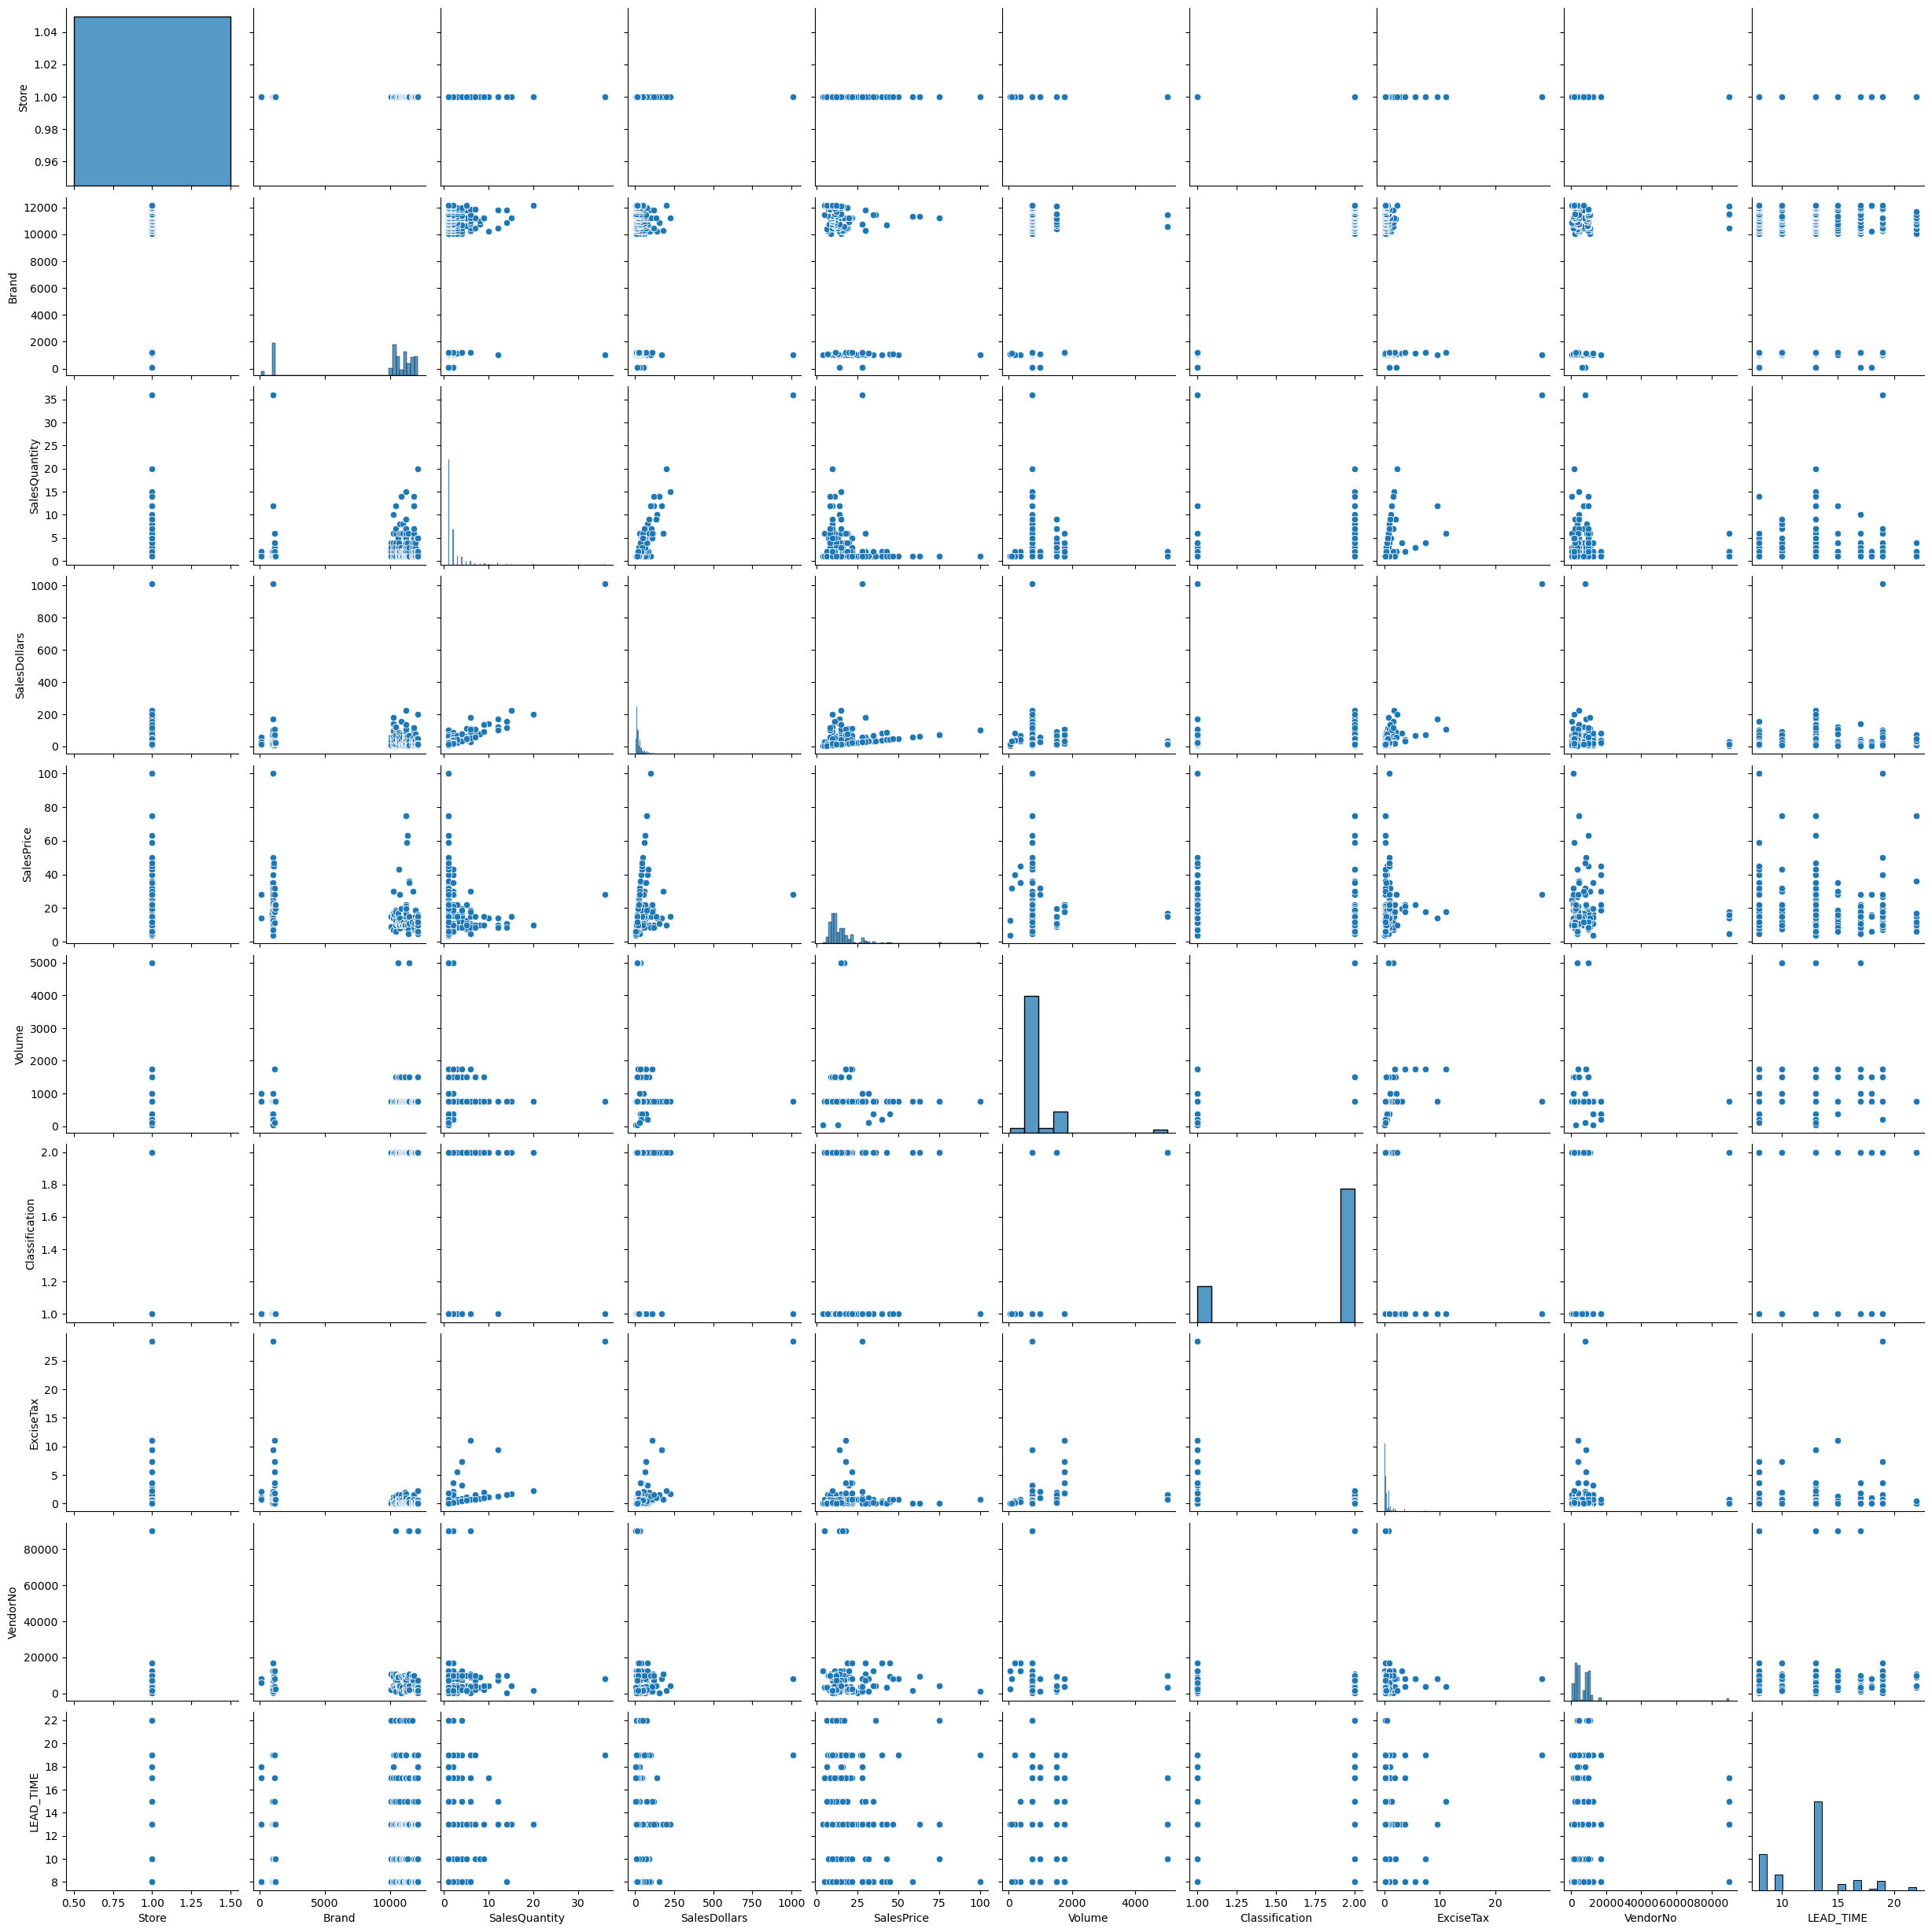

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_sales)
plt.show()

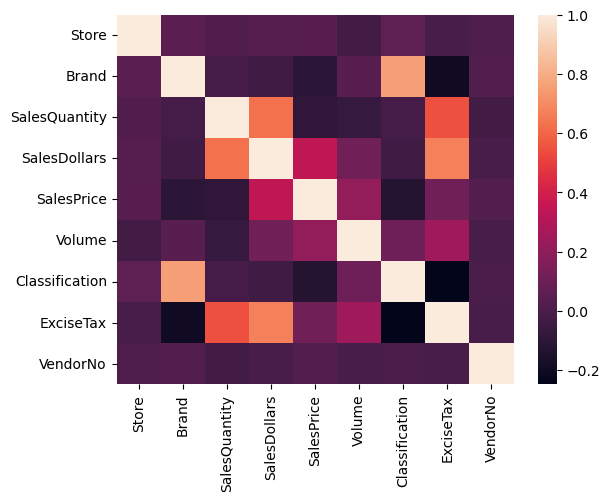

In [45]:
sns.heatmap(df_sales.corr())
plt.show()

# Augmented Dickey-Fuller Test for sales

In [50]:
# Select the "SalesDollars" column as time series data
time_series_data_dollars = df_sales['SalesDollars']

# Perform the Dickey-Fuller Test for SalesDollars
result_dollars = adfuller(time_series_data_dollars)

adf_statistic_dollars = result_dollars[0]
p_value_dollars = result_dollars[1]

print("Dickey-Fuller Test Results for SalesDollars:")
print(f'ADF Statistic: {adf_statistic_dollars}')
print(f'p-value: {p_value_dollars}')

if p_value_dollars <= 0.05:
    print("Null hypothesis rejected. The data for SalesPrice is likely stationary.")
else:
    print("Failed to reject the null hypothesis. The data for SalesPrice may not be stationary.")

Dickey-Fuller Test Results for SalesDollars:
ADF Statistic: -7.35820302728657
p-value: 9.654533940270839e-11
Null hypothesis rejected. The data for SalesPrice is likely stationary.


In [51]:
# Select the "SalesPrice" column as time series data
time_series_data_price = df_sales['SalesPrice']

# Perform the Dickey-Fuller Test for SalesPrice
result_price = adfuller(time_series_data_price)

adf_statistic_price = result_price[0]
p_value_price = result_price[1]

print("Dickey-Fuller Test Results for SalesPrice:")
print(f'ADF Statistic: {adf_statistic_price}')
print(f'p-value: {p_value_price}')

if p_value_price <= 0.05:
    print("Null hypothesis rejected. The data for SalesPrice is likely stationary.")
else:
    print("Failed to reject the null hypothesis. The data for SalesPrice may not be stationary.")

Dickey-Fuller Test Results for SalesPrice:
ADF Statistic: -11.862653108043869
p-value: 6.789324908151128e-22
Null hypothesis rejected. The data for SalesPrice is likely stationary.


# Label Encoding

In [52]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

df_trans_sales = pd.DataFrame()
df_trans_sales['InventoryId'] = enc.fit_transform(df_sales['InventoryId'])
df_trans_sales['Store'] = enc.fit_transform(df_sales['Store']) 
df_trans_sales['Brand'] = enc.fit_transform(df_sales['Brand']) 
df_trans_sales['Description'] = enc.fit_transform(df_sales['Description'])
df_trans_sales['Size'] = enc.fit_transform(df_sales['Size'])
df_trans_sales['SalesQuantity'] = df_sales['SalesQuantity']
df_trans_sales['SalesDollars'] = df_sales['SalesDollars']
df_trans_sales['SalesPrice'] = df_sales['SalesPrice']
df_trans_sales['SalesDate'] = enc.fit_transform(df_sales['SalesDate'])
df_trans_sales['Volume'] = df_sales['Volume']
df_trans_sales['Classification'] = df_sales['Classification']
df_trans_sales['ExciseTax'] = df_sales['ExciseTax']
df_trans_sales['VendorNo'] = df_sales['VendorNo']
df_trans_sales['VendorName'] = enc.fit_transform(df_sales['VendorName']) 
df_trans_sales['LEAD_TIME'] = df_sales['LEAD_TIME']
df_trans_sales


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,LEAD_TIME
0,0,0,2,58,9,1,16.49,16.49,0,750,1,0.79,12546,11,13
1,0,0,2,58,9,2,32.98,16.49,1,750,1,1.57,12546,11,13
2,0,0,2,58,9,1,16.49,16.49,2,750,1,0.79,12546,11,13
3,0,0,2,58,9,1,14.49,14.49,7,750,1,0.79,12546,11,13
4,1,0,3,70,4,2,69.98,34.99,8,375,1,0.79,12546,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,106,0,106,97,9,20,199.80,9.99,22,750,2,2.25,1590,6,13
560,106,0,106,97,9,1,9.99,9.99,28,750,2,0.11,1590,6,19
561,106,0,106,97,9,1,9.99,9.99,29,750,2,0.11,1590,6,13
562,106,0,106,97,9,2,19.98,9.99,30,750,2,0.22,1590,6,8


#  Training and testing

In [53]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse

percentage_test = 0.2  # 20% as a decimal
n_test = int(len(df_trans_sales) * percentage_test)

train_sales = df_trans_sales[:-n_test]
test_sales = df_trans_sales[-n_test:]

selected_columns = ['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume','LEAD_TIME']
train_sales_selected = train_sales[selected_columns]
test_sales_selected = test_sales[selected_columns]

# Create and fit the VAR model
model = VAR(train_sales_selected)
model_fit = model.fit()

# Evaluate the model on the test set
forecast = model_fit.forecast(train_sales_selected.values[-model_fit.k_ar:], steps=n_test)

# Calculate RMSE
rmse_result = rmse(test_sales_selected, forecast)

# Print RMSE
print("RMSE: ", rmse_result)


RMSE:  [  1.76789499   0.          29.16144775  29.03661736   2.24667362
   2.58269079  25.12748597   6.73327742   8.97376334 401.86391907
   3.06496979]


In [54]:
# Number of steps (future time points) you want to forecast
n_forecast = 10  # Change this to the number of steps you desire

# Forecast future values
forecast = model_fit.forecast(model_fit.endog, steps=n_forecast)

print("Forecasted values:")
print(forecast)

Forecasted values:
[[  88.97508752    0.           87.87600229   35.07862986    8.40283579
     2.69235439   29.32436263   11.06386071   13.8888728   928.07945377
    12.53438382]
 [  89.05867143    0.           84.33700507   38.70189166    8.04524838
     2.50514975   30.53427953   12.97613679   15.12146636 1011.20228174
    12.67281824]
 [  89.1775986     0.           81.46357076   41.33692853    7.78931207
     2.38512288   30.63396259   14.14754766   15.61518453 1062.43085773
    12.69196485]
 [  89.31234211    0.           79.11368883   43.35443228    7.60557003
     2.30131265   30.48308295   14.88513643   15.80382646 1094.84190213
    12.69822726]
 [  89.45441243    0.           77.18505421   44.92889777    7.47162037
     2.23781883   30.223942     15.36122142   15.86806828 1115.47877585
    12.70061967]
 [  89.59996921    0.           75.5975451    46.17462462    7.37273076
     2.1887498    29.94597299   15.67931906   15.88249847 1128.49442108
    12.70182529]
 [  89.74722383

# Reorder Point 

In [56]:
reorder_data = df_sales[['Brand','Description','SalesQuantity','SalesPrice','SalesDate','LEAD_TIME']]
reorder_data

,Brand,Description,SalesQuantity,SalesPrice,SalesDate,LEAD_TIME
0,1004,Jim Beam w/2 Rocks Glasses,1,16.49,01/01/2016,13
1,1004,Jim Beam w/2 Rocks Glasses,2,16.49,01/02/2016,13
2,1004,Jim Beam w/2 Rocks Glasses,1,16.49,01/03/2016,13
3,1004,Jim Beam w/2 Rocks Glasses,1,14.49,01/08/2016,13
4,1005,Maker's Mark Combo Pack,2,34.99,01/09/2016,8
...,...,...,...,...,...,...
559,12147,Sterling Vintners CA Meritag,20,9.99,1/23/2016,13
560,12147,Sterling Vintners CA Meritag,1,9.99,1/29/2016,19
561,12147,Sterling Vintners CA Meritag,1,9.99,1/30/2016,13
562,12147,Sterling Vintners CA Meritag,2,9.99,1/31/2016,8


In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
# Create a list of string features
string_features = ['Description','SalesDate']

# Encode the string features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(reorder_data[string_features])

In [58]:
import pickle
pickle.dump(encoder, open('encoder.pkl', 'wb'))

pick_model = pickle.load(open('encoder.pkl', 'rb'))
pick_model

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

numerical_features = ['Brand','SalesQuantity','LEAD_TIME']
features = np.concatenate((encoded_features, df_sales[numerical_features]), axis=1)

# Assuming 'reorder_point' is your target variable
target = reorder_data['SalesPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions on the test set
predictions = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 18.360303282509147


In [60]:
import pickle
pickle.dump(gbr, open('gbr.pkl', 'wb'))

pickled_model = pickle.load(open('gbr.pkl', 'rb'))

import pickle

file_path = 'gbr.pkl'

# Load the content of the .pkl file
with open(file_path, 'rb') as file:
    content = pickle.load(file)

In [61]:
numerical_features = ['Brand','SalesQuantity','LEAD_TIME']
features = np.concatenate((encoded_features, reorder_data[numerical_features]), axis=1)

target = reorder_data['SalesPrice']

from sklearn.ensemble import GradientBoostingRegressor

# Create and train the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(features, target)

GradientBoostingRegressor()

In [62]:
new_instance = pd.DataFrame({
    'Brand': [1005],
    'Description': ['Makers Mark Combo Pack'],
    'SalesQuantity': [1],
    'SalesPrice':[34.99],
    'SalesDate': ['01/30/2016'],
    'LEAD_TIME': [15]
})


In [63]:
encoded_instance = encoder.transform(new_instance[string_features])

instance_features = pd.concat([pd.DataFrame(encoded_instance), new_instance[numerical_features]], axis=1)

reorder_point_prediction = gbr.predict(instance_features)
print(f'Predicted Reorder Point: {reorder_point_prediction[0]}')

Predicted Reorder Point: 24.99351969067099
